In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
accidentes = pd.read_csv("C:/Users/sergi/modalidad/Dataset/X.csv", encoding = 'utf-8')

In [162]:
accidentes.head()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380.0,1642888.0,20.0,2018.0,1507.0,4.0,9.0,15.0,1.0,1.0,1.0
1,-75.592022,6.279157,557526.0,1620950.0,21.0,2018.0,715.0,3.0,3.0,7.0,1.0,1.0,2.0
2,-75.595882,6.275555,674912.0,1640270.0,30.0,2018.0,717.0,4.0,8.0,7.0,2.0,2.0,1.0
3,-75.567284,6.248271,674286.0,1641770.0,10.0,2018.0,1019.0,1.0,9.0,10.0,2.0,2.0,1.0
4,-75.576195,6.213677,681701.0,1645768.0,12.0,2018.0,1419.0,5.0,10.0,14.0,2.0,1.0,1.0


In [163]:
accidentes['NUM_GRAVEDAD'].unique()

array([1., 2., 3.])

In [185]:
submuestra = accidentes.sample(n=150 , random_state=1)
submuestra

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
12254,-75.570616,6.276081,674051.0,1640816.0,4.0,2018.0,516.0,2.0,9.0,5.0,1.0,3.0,4.0
11277,-75.556981,6.249868,564634.0,1625946.0,3.0,2018.0,1016.0,4.0,5.0,10.0,1.0,2.0,1.0
8521,-75.570244,6.241429,556883.0,1617704.0,23.0,2018.0,1013.0,5.0,2.0,10.0,1.0,1.0,2.0
69,-75.569184,6.222983,663499.0,1633001.0,1.0,2018.0,1404.0,7.0,7.0,14.0,1.0,1.0,1.0
11038,-75.564815,6.272931,550162.0,1612466.0,10.0,2018.0,415.0,3.0,1.0,4.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14117,-75.557320,6.237243,680241.0,1646860.0,21.0,2018.0,911.0,7.0,10.0,9.0,2.0,3.0,1.0
34291,-75.575211,6.246884,721422.0,1656834.0,15.0,2019.0,1009.0,2.0,1.0,10.0,2.0,3.0,1.0
34083,-75.554908,6.268121,733334.0,1685492.0,4.0,2019.0,306.0,3.0,9.0,3.0,1.0,2.0,1.0
33729,-75.576757,6.268025,724901.0,1660569.0,17.0,2019.0,517.0,7.0,2.0,5.0,1.0,1.0,1.0


In [186]:
submuestra.shape

(150, 13)

In [187]:
def estimate_bo_b1(x, y):
    
    n = np.size(x)
    
    #Obtenemos los promedios de X y de y
    m_x, m_y = np.mean(x), np.mean(y)
    
    #Calcular sumatoria de XY y mi sumatoria de XX
    Sumatoria_xy = np.sum((x-m_x)*(y-m_y))
    Sumatoria_xx = np.sum(x*(x-m_x))
    
    #coeficiente de regresion
    b_1 = Sumatoria_xy / Sumatoria_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0 , b_1)
       
    

In [220]:
def plot_regression(x,y,b):
    plt.scatter(x , y , color = 'green', marker = 'o', s=30 )
    
    y_pred= b[0] + b[1]*x
    plt.plot(x, y_pred, color = 'blue',label='sin')
    
    plt.xlabel('Meses del año')
    plt.ylabel('Gravedad de accidente')
    plt.grid()

    plt.title('Gravedad con respecto a los meses del año')
 
    
    plt.show()
    

Los valores b0 = 1.4953671768675778, b1 =-0.007764872574059919


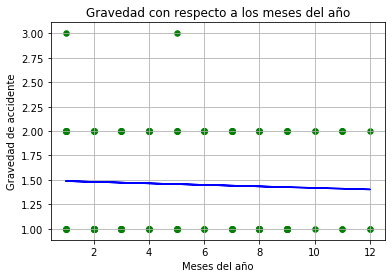

In [223]:
def main():
    
    x = submuestra['MES']
    y = submuestra['NUM_GRAVEDAD']
    
    b = estimate_bo_b1(x,y)
    print(f'Los valores b0 = {b[0]}, b1 ={b[1]}')
    
    plot_regression(x, y, b)
    
if __name__ == '__main__':
    main()